In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyGAN
import os 
import preprocessing as pp
import importlib

In [2]:
path = "E:/projects/01_DATASETS/01_IMAGES/landscape Images/gray"

In [3]:
path = "/Users/amoore/projects/01_DATASETS/landscape_images/gray"

In [4]:
_filenames = os.listdir(path)
data_raw = []
for f in _filenames:
    im = plt.imread(os.path.join(path, f))
    if im.shape[0] == im.shape[1] == 150:
        data_raw.append(im)

In [5]:
data = np.array(data_raw)

In [6]:
train_data = data[:100, :, :]
test_data = data[100:120, :, :]

In [7]:
Ttrain = train_data.reshape(100, 150*150)
Ttest = test_data.reshape(20, 150*150)

In [8]:
preTrainX = []
preTrainT = []

for x in Ttrain:
    preTrainX.append(x)
    preTrainT.append(1)
    preTrainX.append(np.random.randint(0, 256, 22500))
    preTrainT.append(0)

In [9]:
preTrainX = np.array(preTrainX)
preTrainT = np.array(preTrainT).reshape(-1,1)

In [10]:
preTrainX.shape, preTrainT.shape

((200, 22500), (200, 1))

In [11]:
Ttrain.shape

(100, 22500)

In [12]:
Xtrain = np.array([np.random.uniform(0, 1, 10) for i in range(100)])
Xtrain.shape

(100, 10)

In [13]:
Xtest = np.array([])

In [16]:
from Reg_NeuralNet import NeuralNetwork
reg_nn = NeuralNetwork(22500, [1000, 500, 100, 10], [0,1])

In [17]:
reg_nn.train(preTrainX, preTrainT, 200, 0.01)

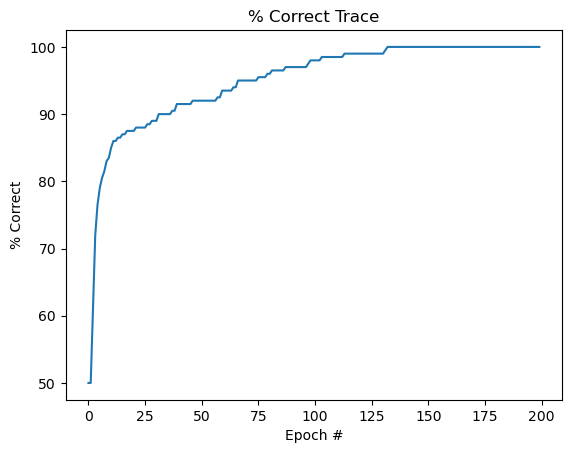

In [19]:
reg_nn.plot_percent_correct_trace()

In [43]:
importlib.reload(pyGAN)

<module 'pyGAN' from '/Users/amoore/projects/pyNN/pyGAN.py'>

In [44]:
nn = pyGAN.pyGAN(10, [10,50,100], [1000, 500, 100, 10], 22500)

In [45]:
nn.train(Xtrain, Ttrain, 100, 0.01, pretrainX=preTrainX, pretrainT=preTrainT, pretrain_epochs=200)

/Users/amoore/projects/pyNN/pyGAN.py:221: RuntimeWarning: invalid value encountered in power
  deltai = -0.5 * np.power((self.dis_iv - Y), -0.5)


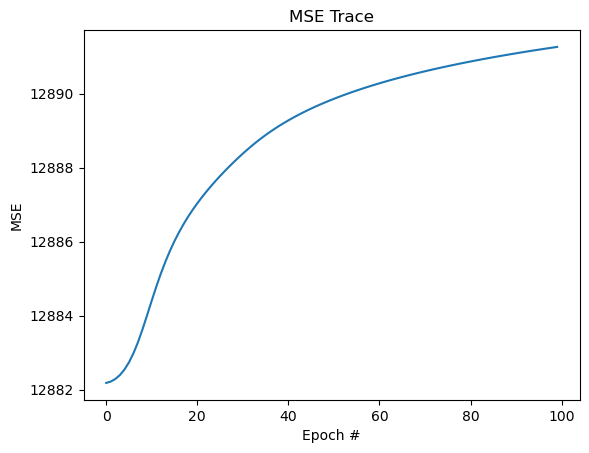

In [46]:
nn.plot_mse_trace()

In [47]:
Xtest = np.array([np.random.uniform(0, 1, 10) for i in range(100)])

In [48]:
Xtest.shape

(100, 10)

In [49]:
Y = nn.use(Xtest, "G")

In [50]:
Ydis_1 = reg_nn.use(Ttest)

In [51]:
Ydis_1

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]]),
 array([[0.4378064 , 0.5621936 ],
        [0.01846785, 0.98153215],
        [0.35611979, 0.64388021],
        [0.02012618, 0.97987382],
        [0.10376626, 0.89623374],
        [0.2586199 , 0.7413801 ],
        [0.06765045, 0.93234955],
        [0.06161142, 0.93838858],
        [0.02619933, 0.97380067],
        [0.01966696, 0.98033304],
        [0.10002213, 0.89997787],
        [0.08248707, 0.91751293],
        [0.02019364, 0.97980636],
        [0.01456849, 0.98543151],
        [0.02613435, 0.97386565],
        [0.79679489, 0.20320511],
        [0.77780899, 0.22219101],
        [0.0189791 , 0.9810209 ],
        [0.13831033, 0.86168967],
        [0.0850755 , 0.9149245 ]]))

In [52]:
Ydis = nn.use(Ttest, net_type="D")

In [53]:
Ydis

(array([[0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0]]),
 array([[0.50020372, 0.49979628],
        [0.39282959, 0.60717041],
        [0.50005617, 0.49994383],
        [0.50003824, 0.49996176],
        [0.49999619, 0.50000381],
        [0.39325666, 0.60674334],
        [0.49996057, 0.50003943],
        [0.50066047, 0.49933953],
        [0.35494057, 0.64505943],
        [0.39285904, 0.60714096],
        [0.79744593, 0.20255407],
        [0.52602978, 0.47397022],
        [0.39286953, 0.60713047],
        [0.23404336, 0.76595664],
        [0.50012353, 0.49987647],
        [0.79551437, 0.20448563],
        [0.50039959, 0.49960041],
        [0.47256192, 0.52743808],
        [0.46913076, 0.53086924],
        [0.50470939, 0.49529061]]))

In [175]:
Xtest.shape

(100, 10)

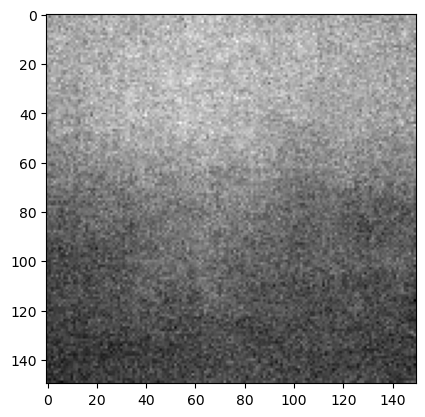

In [54]:
plt.imshow(Y[10].reshape(150, 150), cmap="gray")